In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
# from dython import nominal

In [143]:
#Importing the dataset
path='churn.csv'
df=pd.read_csv(path,index_col=0)
df

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,1
36988,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36989,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0


In [144]:
df.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [145]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


### Removing extra columns

First we remove column just by observation. We can see that we do not need the columns:

- security_no (irrelevant)
- referral_id (irrelevant)
- joining_date (not something we are interested in)
- last_visit_time (since we have days_since_last_login)
- avg_frequency_login_days (since we have days_since_last_login)


In [146]:
df = df.loc[:,['age', 'gender', 'region_category',
       'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score']].copy(deep=True)

### Remove NaN values

In [147]:
#Checing NaN values in each column
check_nan = df.isnull().sum()
print("The number of NaN values in each column are: \n",check_nan)

#Removing rows with NaN values as the remaining number of rows are sufficuent
print("Dropping rows with NaN values")
df=df.dropna()

# #Checking the rows again for NaN values
# check_nan_post_processing=df.isnull().sum()
# print("The number of NaN values in each column are: \n",check_nan_post_processing)

The number of NaN values in each column are: 
 age                                0
gender                             0
region_category                 5428
membership_category                0
joined_through_referral            0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64
Dropping rows with NaN values


In [148]:
print("Shape of the dataset after removing NaN and error values: \n", df.shape)

Shape of the dataset after removing NaN and error values: 
 (28373, 18)


### Balancing Categorical Features

#### Training Features

In [149]:
# #Getting the names of categorical columns
category = ['object','int64']
categorical_column=df.select_dtypes(include=category)
categorical_column=categorical_column.drop(['age','days_since_last_login'], axis=1)
len(categorical_column.columns)

13

In [150]:
df

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.630000,53005.25,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.160000,21027.00,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.270000,25239.56,567.660000,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.130000,24483.66,663.060000,No,Yes,Yes,Solved,Poor Website,1
5,13,M,City,Gold Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,23,433.620000,13884.77,722.270000,Yes,No,Yes,Unsolved,No reason specified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13,418.380000,56397.21,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,0
36986,27,M,Town,Platinum Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13,135.830000,8225.68,748.570000,Yes,No,No,Not Applicable,No reason specified,0
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13,-638.123421,11069.71,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,482.610000,2378.86,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0


### Getting unique values

In [151]:
print(df['gender'].value_counts())
print('')
print(df['region_category'].value_counts())
print('')
print(df['membership_category'].value_counts())
print('')
print(df['joined_through_referral'].value_counts())
print('')
print(df['preferred_offer_types'].value_counts())
print('')
print(df['medium_of_operation'].value_counts())
print('')
print(df['internet_option'].value_counts())
print('')
print(df['used_special_discount'].value_counts())
print('')
print(df['offer_application_preference'].value_counts())
print('')
print(df['past_complaint'].value_counts())
print('')
print(df['complaint_status'].value_counts())
print('')
print(df['feedback'].value_counts())



F          14203
M          14127
Unknown       43
Name: gender, dtype: int64

Town       12704
City       11402
Village     4267
Name: region_category, dtype: int64

Basic Membership       5897
No Membership          5879
Gold Membership        5208
Silver Membership      4628
Premium Membership     3428
Platinum Membership    3333
Name: membership_category, dtype: int64

No     12180
Yes    12021
?       4172
Name: joined_through_referral, dtype: int64

Gift Vouchers/Coupons       9550
Credit/Debit Card Offers    9505
Without Offers              9318
Name: preferred_offer_types, dtype: int64

Smartphone    10710
Desktop       10610
?              4098
Both           2955
Name: medium_of_operation, dtype: int64

Mobile_Data    9491
Wi-Fi          9462
Fiber_Optic    9420
Name: internet_option, dtype: int64

Yes    15572
No     12801
Name: used_special_discount, dtype: int64

Yes    15717
No     12656
Name: offer_application_preference, dtype: int64

No     14222
Yes    14151
Name: pas

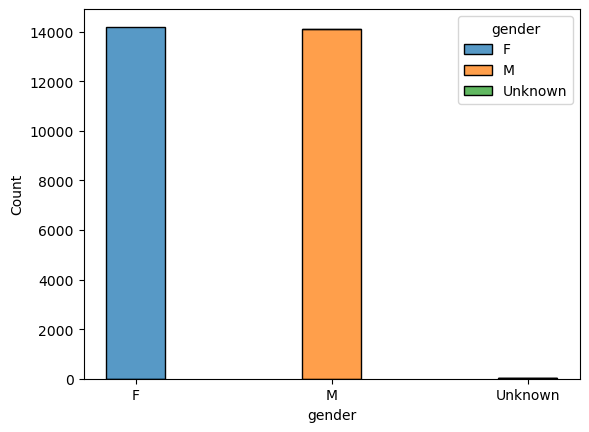

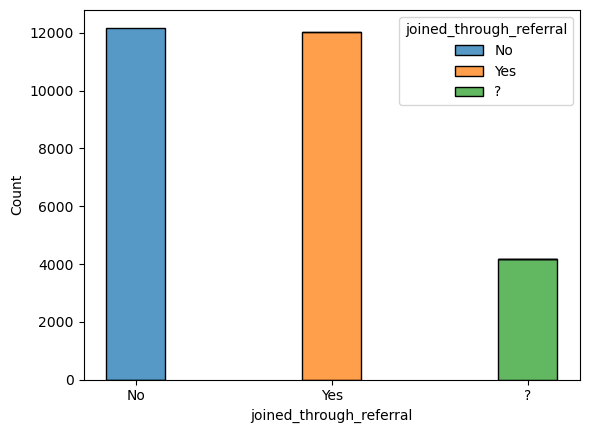

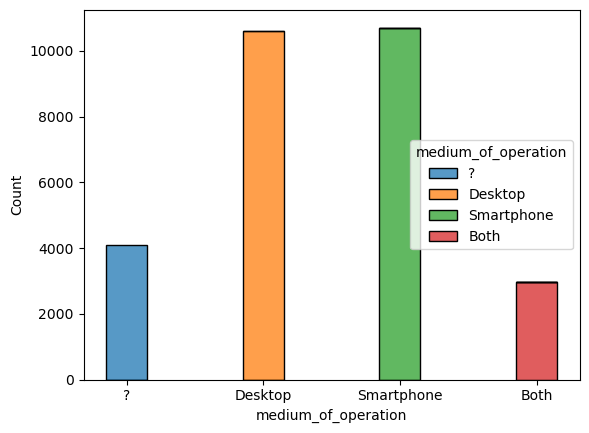

In [152]:
sns.histplot(data=df,x='gender',hue='gender',multiple="stack",shrink=0.3)
plt.show()
sns.histplot(data=df,x='joined_through_referral',hue='joined_through_referral',multiple="stack",shrink=0.3)
plt.show()
sns.histplot(data=df,x='medium_of_operation',hue='medium_of_operation',multiple="stack",shrink=0.3)
plt.show()

Observing these, we can see that there are junk values in:
- gender
- joined_through_referral
- medium_of_operation

#### Remove junk values from categorical columns

In [153]:
#gender
df = df.loc[df.loc[:,'gender'].isin(['M','F']), :].copy(deep=True)
df.shape

(28330, 18)

In [154]:
df = df.loc[df.loc[:,'joined_through_referral'].isin(['No','Yes']), :].copy(deep=True)
df.shape

(24166, 18)

In [156]:
df = df.loc[~df.loc[:,'medium_of_operation'].isin(['?']), :].copy(deep=True)
df.reset_index(inplace=True,drop=True)
df.shape

(20694, 18)

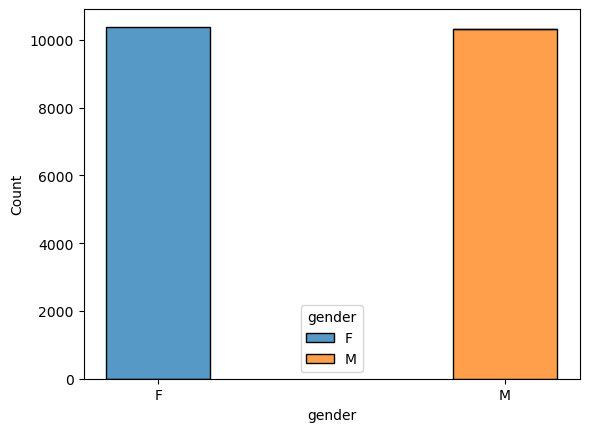

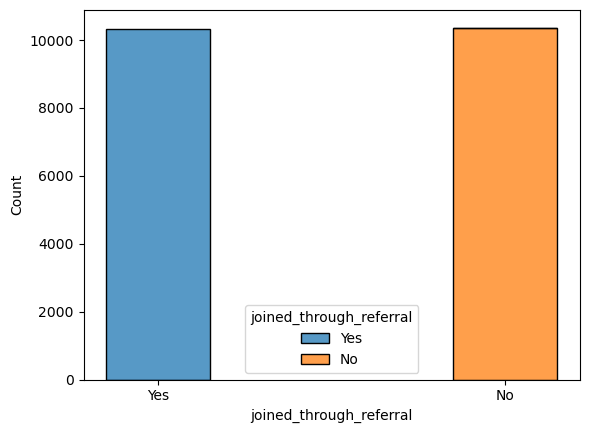

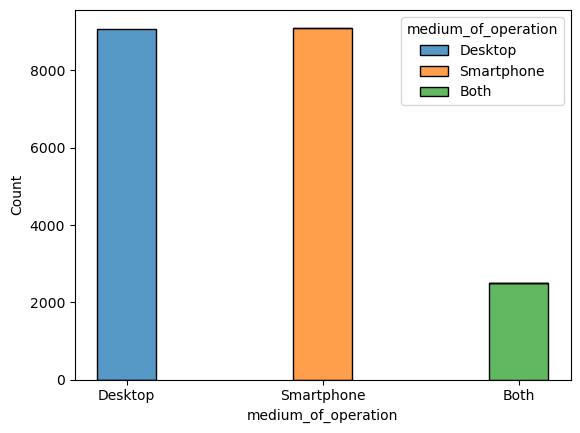

In [157]:
sns.histplot(data=df,x='gender',hue='gender',multiple="stack",shrink=0.3)
plt.show()
sns.histplot(data=df,x='joined_through_referral',hue='joined_through_referral',multiple="stack",shrink=0.3)
plt.show()
sns.histplot(data=df,x='medium_of_operation',hue='medium_of_operation',multiple="stack",shrink=0.3)
plt.show()

In [158]:
df.shape

(20694, 18)

### Detect Numerical Outliers

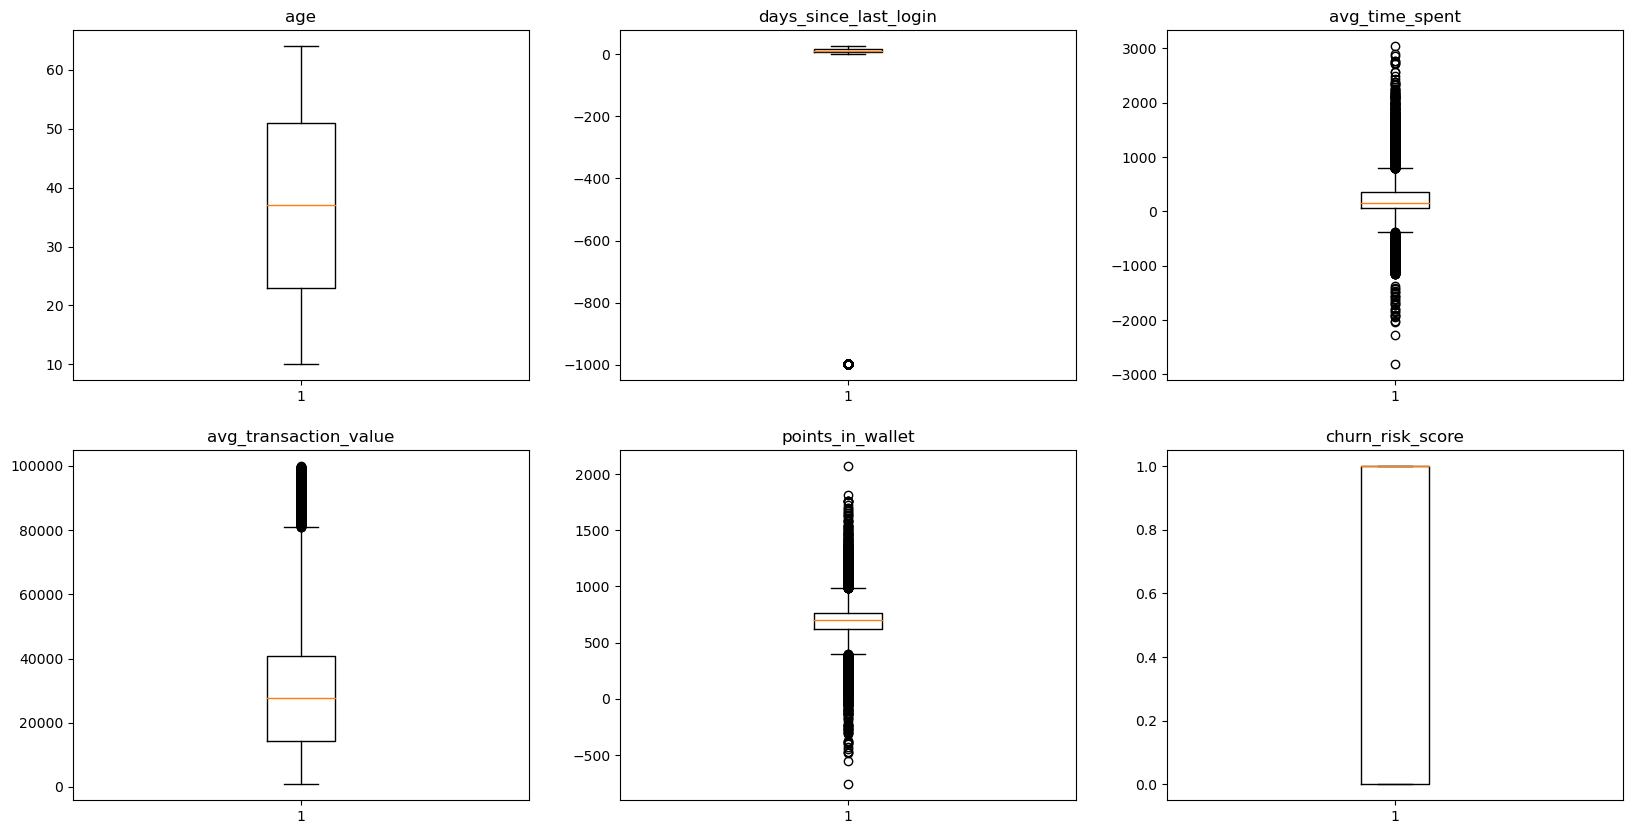

In [159]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#Getting numeric column
df_numeric = df.select_dtypes(include=numerics)
numeric_col=df_numeric.columns

#Deciding the shape of the subplot
shape_subplot=int((len(numeric_col)/2))

# #Plotting boxplots
figure, axis = plt.subplots(2,shape_subplot)
figure.set_figheight(10)
figure.set_figwidth(20)
for i,j in enumerate (numeric_col):
    if i<3:
        axis[0,i].boxplot(df[str(j)])
        axis[0, i].set_title(j)
    else:
        axis[1,i-3].boxplot(df[str(j)])
        axis[1, i-3].set_title(j)

Through this we can clearly see there outliers are present in the column:
- days_since_last_login -> There is a negative value that needs to be removed
- avg_time_spent -> There are negative values that need to be removed
- point_in_wallet -> There are negative values that need to be removed

In [62]:
# #Deleting outliers from these columns
# #This function will calculate the mean and std of each column and use them to delete the outliers
# def remove_outliers(df,columns):
#     for i in columns:
#         Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
#         Q3 = np.percentile(df[i], 75, interpolation = 'midpoint')
#         IQR = Q3 - Q1
#         upper = Q3 + (1.5*IQR)
#         lower = Q1 - (1.5*IQR)   
#         df=df[(df[i]>lower) & (df[i]<upper)]
#     return df

# df=remove_outliers(df,numeric_col)
# print("Shape of the dataset after removing numerical outliers: \n", df.shape)

In [160]:
df=df[df['days_since_last_login']>0]
print(df.shape)


df=df[df['avg_time_spent']>0]
print(df.shape)
df=df[df['points_in_wallet']>0]
print(df.shape)

(19550, 18)
(18628, 18)
(18562, 18)


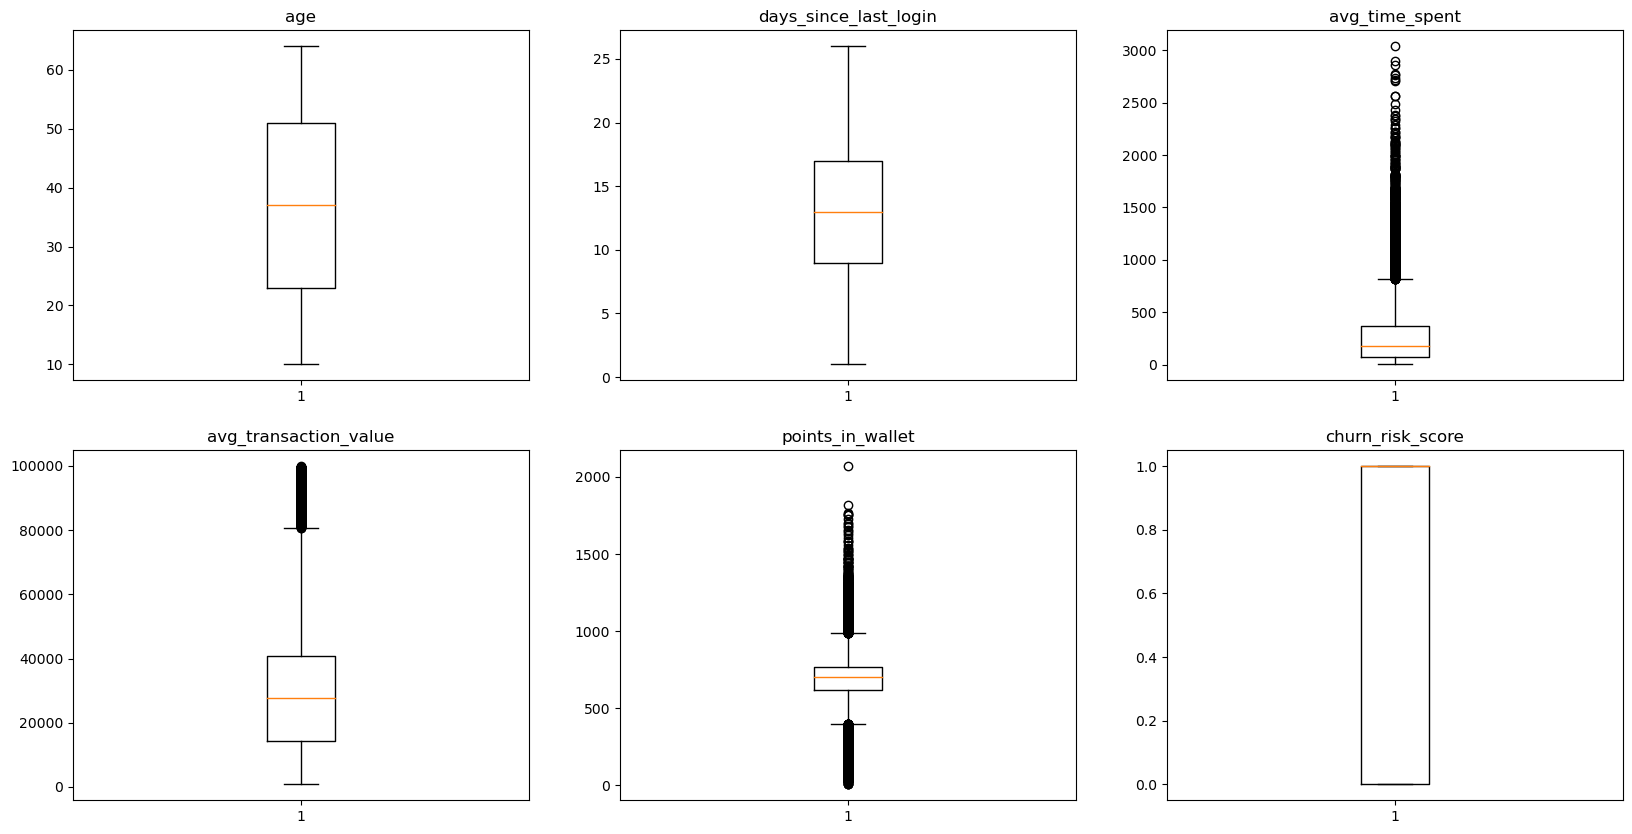

In [71]:
# #Plotting boxplots after removing outliers
figure, axis = plt.subplots(2,shape_subplot)
figure.set_figheight(10)
figure.set_figwidth(20)
plt.title("Before")
for i,j in enumerate (numeric_col):
    if i<3:
        axis[0,i].boxplot(df[str(j)])
        axis[0, i].set_title(j)
    else:
        axis[1,i-3].boxplot(df[str(j)])
        axis[1, i-3].set_title(j)

### Checking Target Variable

<AxesSubplot:ylabel='churn_risk_score'>

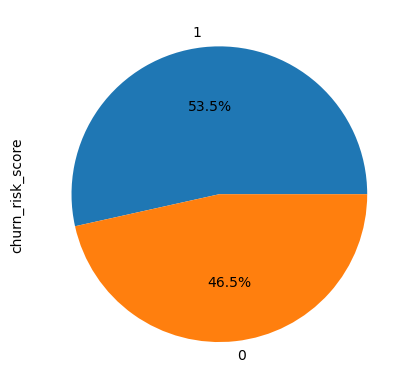

In [65]:
#We check to see if the target variable is balanced or not
#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
pie=df['churn_risk_score'].value_counts()
pie.plot.pie(autopct="%.1f%%")

### Finding Correlation

#### Using heatmap

In [66]:
# #Getting the names of categorical columns
# category = ['object','int64']
# categorical_column=df.select_dtypes(include=category)
categorical_column=df.drop(['age','days_since_last_login','avg_time_spent','avg_transaction_value','points_in_wallet'], axis=1)
categorical_column.dtypes

gender                          object
region_category                 object
membership_category             object
joined_through_referral         object
preferred_offer_types           object
medium_of_operation             object
internet_option                 object
used_special_discount           object
offer_application_preference    object
past_complaint                  object
complaint_status                object
feedback                        object
churn_risk_score                 int64
dtype: object

In [67]:
labelenc = preprocessing.LabelEncoder()
categorical_column['gender']=labelenc.fit_transform(categorical_column['gender'])
categorical_column['region_category']=labelenc.fit_transform(categorical_column['region_category'])
categorical_column['membership_category']=labelenc.fit_transform(categorical_column['membership_category'])
categorical_column['joined_through_referral']=labelenc.fit_transform(categorical_column['joined_through_referral'])
categorical_column['preferred_offer_types']=labelenc.fit_transform(categorical_column['preferred_offer_types'])
categorical_column['medium_of_operation']=labelenc.fit_transform(categorical_column['medium_of_operation'])
categorical_column['internet_option']=labelenc.fit_transform(categorical_column['internet_option'])
categorical_column['used_special_discount']=labelenc.fit_transform(categorical_column['used_special_discount'])
categorical_column['offer_application_preference']=labelenc.fit_transform(categorical_column['offer_application_preference'])
categorical_column['past_complaint']=labelenc.fit_transform(categorical_column['past_complaint'])
categorical_column['complaint_status']=labelenc.fit_transform(categorical_column['complaint_status'])
categorical_column['feedback']=labelenc.fit_transform(categorical_column['feedback'])

categorical_column.reset_index(drop=True,inplace=True)
categorical_column

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,1,2,1,1,1,2,0,1,1,3,3,1
1,1,0,2,1,1,1,1,0,1,1,4,3,1
2,0,0,2,0,0,2,1,0,1,1,2,3,1
3,1,1,1,1,1,1,1,1,0,1,3,0,0
4,0,2,0,1,1,0,2,1,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,1,1,1,0,2,1,0,0,1,0,1,4,0
18558,0,2,4,0,1,1,0,1,1,1,4,4,0
18559,1,1,3,1,0,1,1,1,0,0,1,0,0
18560,1,2,3,0,1,2,1,1,1,0,1,0,0


In [68]:
num=categorical_column.columns
numerical_column=df.drop(num, axis=1)
numerical_column.reset_index(drop=True,inplace=True)
numerical_column

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
0,44,14,516.16,21027.00,500.690000
1,37,11,53.27,25239.56,567.660000
2,31,20,113.13,24483.66,663.060000
3,21,10,55.38,8982.50,756.210000
4,25,14,570.23,35119.93,699.700000
...,...,...,...,...,...
18557,51,24,312.33,63446.71,778.700000
18558,12,13,418.38,56397.21,725.890000
18559,27,13,135.83,8225.68,748.570000
18560,53,15,482.61,2378.86,197.264414


In [69]:
frames=[numerical_column,categorical_column]
cor=pd.concat(frames,axis=1)
cor

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,44,14,516.16,21027.00,500.690000,0,1,2,1,1,1,2,0,1,1,3,3,1
1,37,11,53.27,25239.56,567.660000,1,0,2,1,1,1,1,0,1,1,4,3,1
2,31,20,113.13,24483.66,663.060000,0,0,2,0,0,2,1,0,1,1,2,3,1
3,21,10,55.38,8982.50,756.210000,1,1,1,1,1,1,1,1,0,1,3,0,0
4,25,14,570.23,35119.93,699.700000,0,2,0,1,1,0,2,1,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,51,24,312.33,63446.71,778.700000,1,1,1,0,2,1,0,0,1,0,1,4,0
18558,12,13,418.38,56397.21,725.890000,0,2,4,0,1,1,0,1,1,1,4,4,0
18559,27,13,135.83,8225.68,748.570000,1,1,3,1,0,1,1,1,0,0,1,0,0
18560,53,15,482.61,2378.86,197.264414,1,2,3,0,1,2,1,1,1,0,1,0,0


<AxesSubplot:>

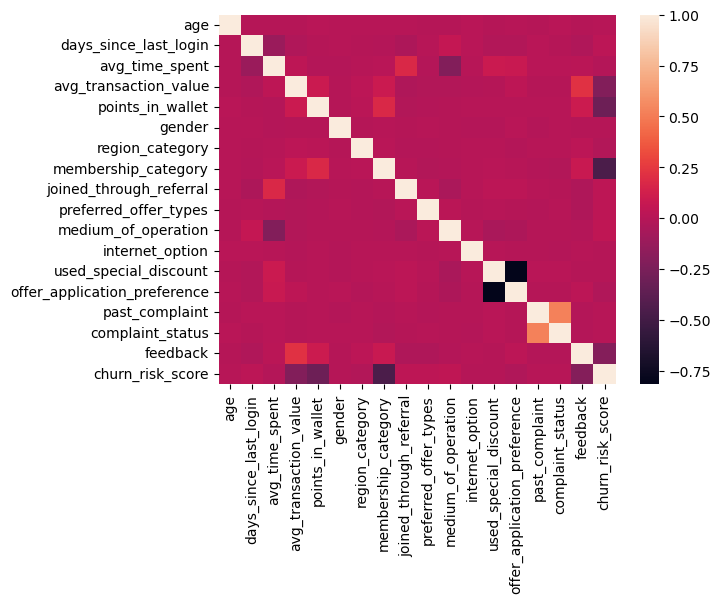

In [70]:
x=cor.corr()
sns.heatmap(x)

We can clearly observe that the correlation between the variables is not high.

Since the variables are negatively correlated, this indicated they are independant from each other we can use decison trees, random trees and random forests as our classifiers

#### Split Training and Testing Data


In [175]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=30)

print("Shape of x_train:  ", x_train.shape)
print("Shape of x_test:  ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print('Shape of y_test: ',y_test.shape)

x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

Shape of x_train:   (12250, 17)
Shape of x_test:   (6312, 17)
Shape of y_train:  (12250,)
Shape of y_test:  (6312,)
